In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

C:\Users\Sheon\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
nb_classes = 10 # number of classes

# split the data into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape:", X_train.shape)
print("y_train original shape:", y_train.shape)

X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)


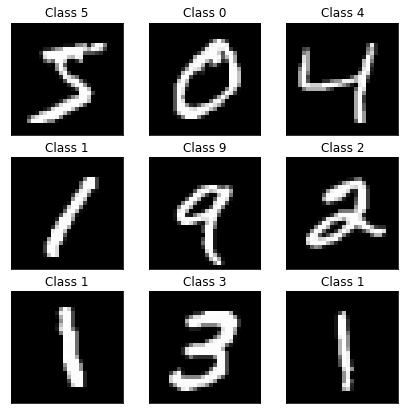

In [3]:
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.title("Class {}".format(y_train[i]))

In [4]:
X_train = X_train.reshape(60000, 784) # reshape the 28*28 image into a single 784 dimensional vector
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') # convert the data type into 'float32'
X_test = X_test.astype('float32')
X_train /= 255 # normalization
X_test /= 255
print("X_train matrix shape:", X_train.shape)
print("X_test matrix shape:", X_test.shape)

X_train matrix shape: (60000, 784)
X_test matrix shape: (10000, 784)


In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes) # converts a class vector to binary class matrix
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("Y_train matrix shape:", Y_train.shape)
print("Y_test matrix shape:", Y_test.shape)

Y_train matrix shape: (60000, 10)
Y_test matrix shape: (10000, 10)


In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)  

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5, 
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.2497 - acc: 0.9252 - val_loss: 0.1140 - val_acc: 0.9642
Epoch 2/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.0989 - acc: 0.9690 - val_loss: 0.0845 - val_acc: 0.9754
Epoch 3/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.0727 - acc: 0.9769 - val_loss: 0.0739 - val_acc: 0.9766
Epoch 4/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.0570 - acc: 0.9816 - val_loss: 0.0647 - val_acc: 0.9803
Epoch 5/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.0451 - acc: 0.9849 - val_loss: 0.0690 - val_acc: 0.9789


In [9]:
score = model.evaluate(X_test, Y_test)
print('Total loss on testing set:', score[0])
print('Accuracy of testing set:', score[1])

10000/10000 [==============================] - 0s 48us/step
Total loss on testing set: 0.06901814283100684
Accuracy of testing set: 0.9789


In [10]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

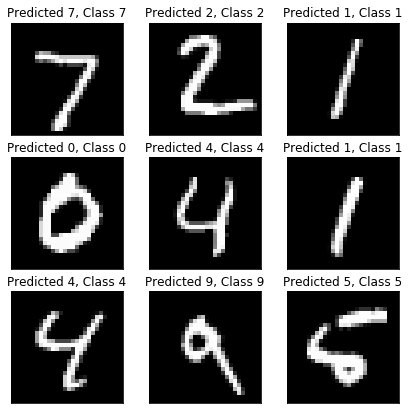

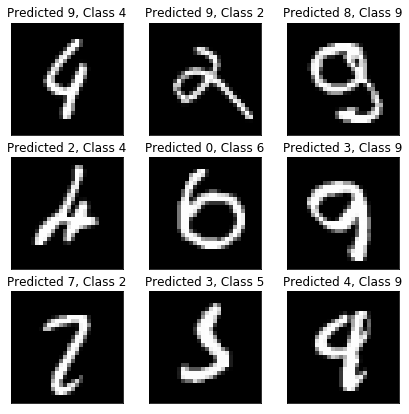

In [11]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))